In [312]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare, poisson
import altair as alt
import scipy.stats as stats

alt.data_transformers.enable('vegafusion')
import altair as alt
print(alt.__version__)


5.2.0


# Import Data

In [261]:
seoulBike = pd.read_csv("SeoulBikeData.csv",encoding='ISO-8859-1')

seoulBike['Date'] = pd.to_datetime(seoulBike['Date'], format='%d/%m/%Y')
#seoulBike["Holiday"] = seoulBike["Holiday"].replace({'No Holiday': 0, 'Holiday': 1})
seoulBike['Month'] = seoulBike['Date'].dt.month
seoulBike['Seasons'] = pd.Categorical(seoulBike['Seasons'], 
                                      categories=['Spring', 'Summer', 'Autumn', 'Winter'], 
                                      ordered=True)
#seoulBike["Functioning Day"] = seoulBike["Functioning Day"].replace({'No': 0, 'Yes': 1})
def map_to_weekday(day_of_week):
    if day_of_week < 5:  
        return '1'
    else:
        return '0'
    
seoulBike['Weekday'] = seoulBike['Date'].dt.dayofweek
seoulBike['WeekdayOrNot'] = seoulBike['Date'].dt.dayofweek.apply(map_to_weekday)
seoulBike['WeekdayOrNot'] = seoulBike['WeekdayOrNot'].astype(int)

seoulBike = seoulBike[['Date', 'Month', "Weekday",'WeekdayOrNot', 'Hour', 'Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']]


seoulBike

,Date,Month,Weekday,WeekdayOrNot,Hour,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,12,4,1,0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,12,4,1,1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,12,4,1,2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,12,4,1,3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,12,4,1,4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,11,4,1,19,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,11,4,1,20,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,11,4,1,21,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,11,4,1,22,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [262]:
seoulBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Month                      8760 non-null   int64         
 2   Weekday                    8760 non-null   int64         
 3   WeekdayOrNot               8760 non-null   int32         
 4   Hour                       8760 non-null   int64         
 5   Rented Bike Count          8760 non-null   int64         
 6   Temperature(°C)            8760 non-null   float64       
 7   Humidity(%)                8760 non-null   int64         
 8   Wind speed (m/s)           8760 non-null   float64       
 9   Visibility (10m)           8760 non-null   int64         
 10  Dew point temperature(°C)  8760 non-null   float64       
 11  Solar Radiation (MJ/m2)    8760 non-null   float64       
 12  Rainfa

In [263]:
seoulBike.isnull().sum()

Date                         0
Month                        0
Weekday                      0
WeekdayOrNot                 0
Hour                         0
Rented Bike Count            0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There is no missing data in the seoulBike dataframe

In [264]:
seoulBike.describe()

,Month,Weekday,WeekdayOrNot,Hour,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,6.526027,3.002740,0.715068,11.500000,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,3.448048,1.998056,0.451408,6.922582,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,1.000000,0.000000,0.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000,5.750000,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,7.000000,3.000000,1.000000,11.500000,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,10.000000,5.000000,1.000000,17.250000,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,12.000000,6.000000,1.000000,23.000000,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# Data Distribution

## 这里画violin plot

In [265]:
X = seoulBike.drop(["Rented Bike Count", "Functioning Day"], axis=1)
y1 = seoulBike["Rented Bike Count"]
y2 = seoulBike["Functioning Day"]

## Independent variable distribution

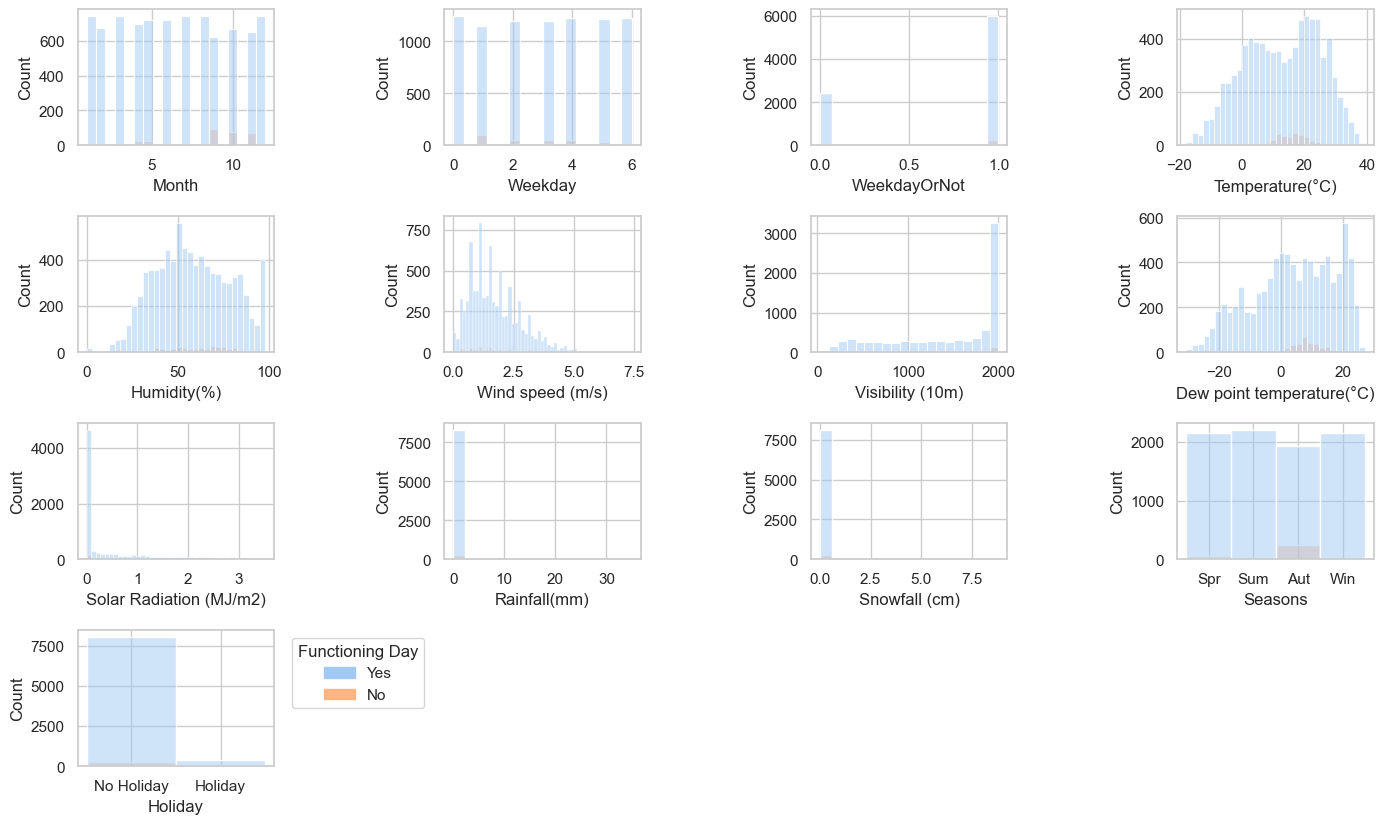

In [266]:
sns.set(style="whitegrid")
sns.set_palette("pastel")

plt.figure(figsize=(14, 10))

variables = X.drop(["Date","Hour"], axis=1).columns

current_palette = sns.color_palette()
light_blue = current_palette[0]  
light_orange = current_palette[1] 

#color_map = {1: light_blue, 0: light_orange}
color_map = {"Yes": light_blue, "No": light_orange}


seasons_map = {
    'Spring': 'Spr', 'Summer': 'Sum', 'Autumn': 'Aut', 'Winter': 'Win'
}

for i, var in enumerate(variables):
    plt.subplot(5, 4, i + 1)
    if var == "Seasons":
        temp_data = seoulBike.copy()
        temp_data['Seasons'] = temp_data['Seasons'].map(seasons_map)
        sns.histplot(data=temp_data, x='Seasons', hue='Functioning Day', palette=color_map, legend=False)
    else:
        sns.histplot(data=seoulBike, x=var, hue='Functioning Day', palette=color_map, legend=False)

handles = [plt.Rectangle((0,0),1,1, color=color_map[label]) for label in color_map]
labels = color_map.keys()
plt.legend(handles, labels, title='Functioning Day', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Pairs plot

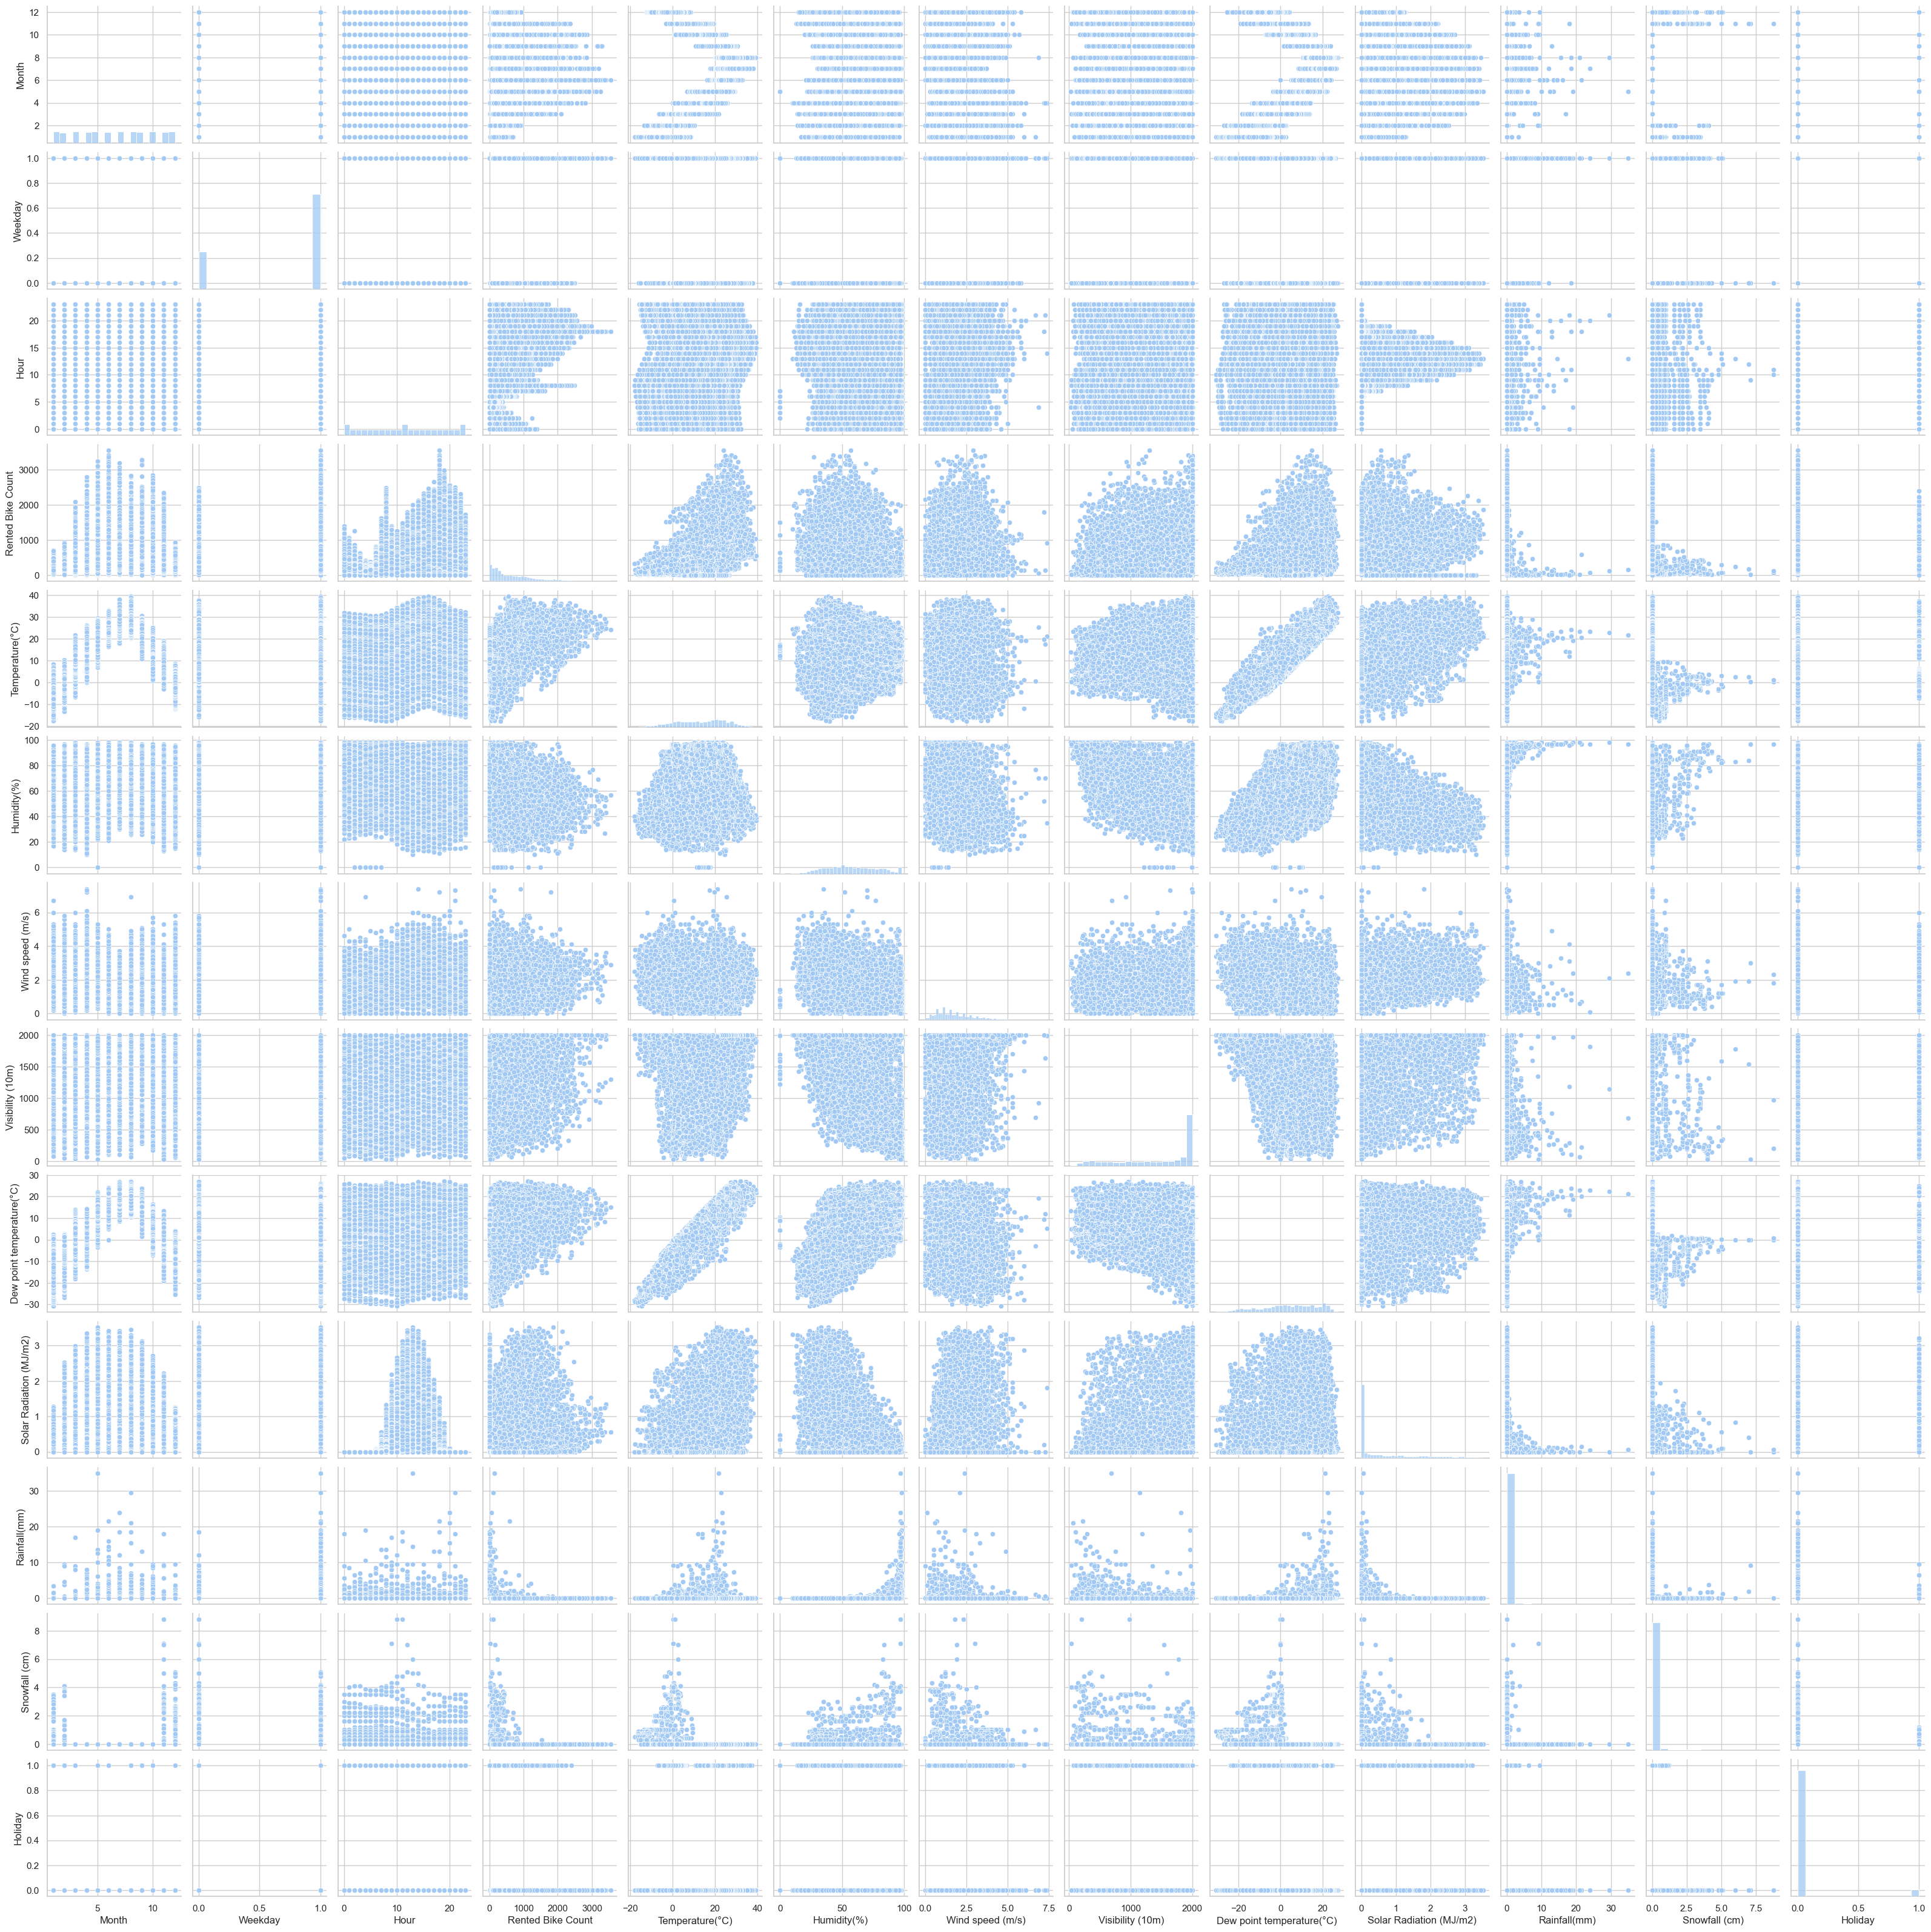

In [117]:
sns.pairplot(seoulBike.drop(["Functioning Day"], axis = 1))
plt.show()

## Heapmap(要跑太久了先comment掉了)

In [118]:
# df_heatmap = seoulBike.copy()
# season_mapping = {'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4}
# functioning_day_mapping = {'Yes':1, 'No': 0}
# df_heatmap['Seasons'] = df_heatmap['Seasons'].replace(season_mapping)
# df_heatmap['Functioning Day'] = df_heatmap['Functioning Day'].replace(functioning_day_mapping)

# df_heatmap.head()
# df_heatmap.info()

# plt.figure(figsize=(8, 6))
# sns.heatmap(df_heatmap.drop("Date",axis = 1), annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
# plt.title('Heatmap of DataFrame')
# plt.show()

,Date,Month,Weekday,Hour,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,12,1,0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0,1
1,2017-12-01,12,1,1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0,1
2,2017-12-01,12,1,2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0,1
3,2017-12-01,12,1,3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,0,1
4,2017-12-01,12,1,4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0,1


In [228]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_vif = seoulBike.select_dtypes(include=['int64', 'float64'])
data_vif = data_vif.drop(labels = ["Rented Bike Count","Holiday"], axis = 1)


data_vif['Intercept'] = 1
data_vif
vif_data = pd.DataFrame()
vif_data["feature"] = data_vif.columns
vif_data["VIF"] = [variance_inflation_factor(data_vif.values, i) for i in range(len(data_vif.columns))]
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
vif_data_sorted

,feature,VIF
10,Intercept,398.892111
6,Dew point temperature(°C),115.691190
2,Temperature(°C),87.155253
3,Humidity(%),20.384721
7,Solar Radiation (MJ/m2),2.021475
5,Visibility (10m),1.599482
4,Wind speed (m/s),1.295987
1,Hour,1.185122
0,Month,1.114688
9,Snowfall (cm),1.107048


From the pairs plot and the VIF report, we have seen that the `Dew point temperature` has high correlation with `Temperature`, it will cause high multicollinearly in the model. If we want to use linear model in analysis, we might need to remove the `Dew point temperature` to reduce collinearly.

## Explore response variables' distribution

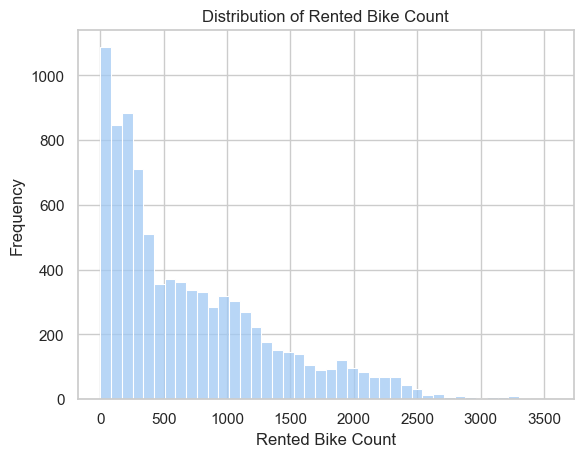

In [229]:
sns.histplot(y1) 
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

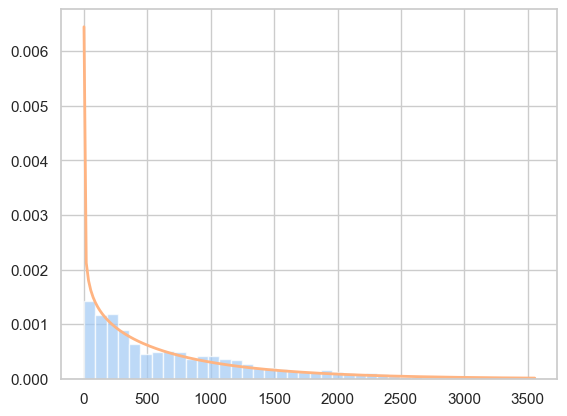

In [230]:
x = np.linspace((y1 + 0.1).min(), (y1 + 0.1).max(), 200)
shape_gamma, loc_gamma, scale_gamma = stats.gamma.fit(y1 + 0.1, floc=0)
p_gamma = stats.gamma.pdf(x, shape_gamma, loc_gamma, scale_gamma)
plt.hist((y1 + 1), bins=40, alpha=0.7, density=True)
plt.plot(x, p_gamma, linewidth=2, label='Gamma Distribution Fit')

In [231]:
from scipy.stats import gamma, kstest

# 提取数据
data = y1

# 从数据中拟合Gamma分布
params = gamma.fit(data)

# 生成相同数量的Gamma分布数据
gamma_dist = gamma(*params)

# 进行KS测试
ks_stat, ks_p_value = kstest(data, gamma_dist.cdf)

# 打印KS测试的结果
print(f"KS Statistic: {ks_stat}, P-value: {ks_p_value}")


KS Statistic: 0.1322315231872091, P-value: 5.037582228513406e-134


Rented Bike Count does not follow gamma distribution

In [232]:
from scipy.stats import kstest, poisson
ks_statistic, p_value = kstest(y1, 'poisson', args=(np.mean(y1),))
print("Kolmogorov-Smirnov statistic:", ks_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("y does not follow poisson distribution")
else:
    print("y follows poisson distribution")

Kolmogorov-Smirnov statistic: 0.5588529934657052
p-value: 0.0
y does not follow poisson distribution


From the KS test and histogram above, we can see that the original data does not follow neither normal distribution nor poisson distribuion

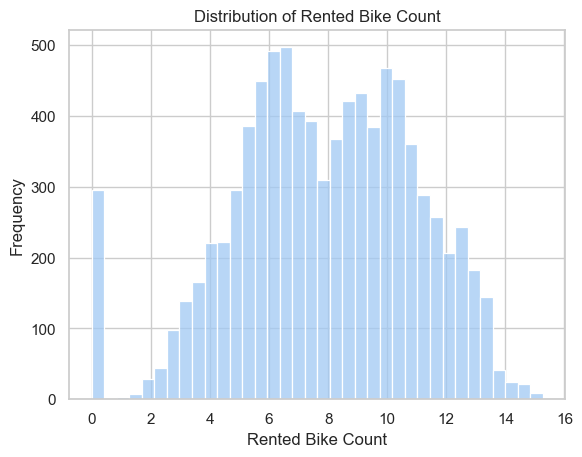

In [233]:
sns.histplot(y1**(1/3)) 
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

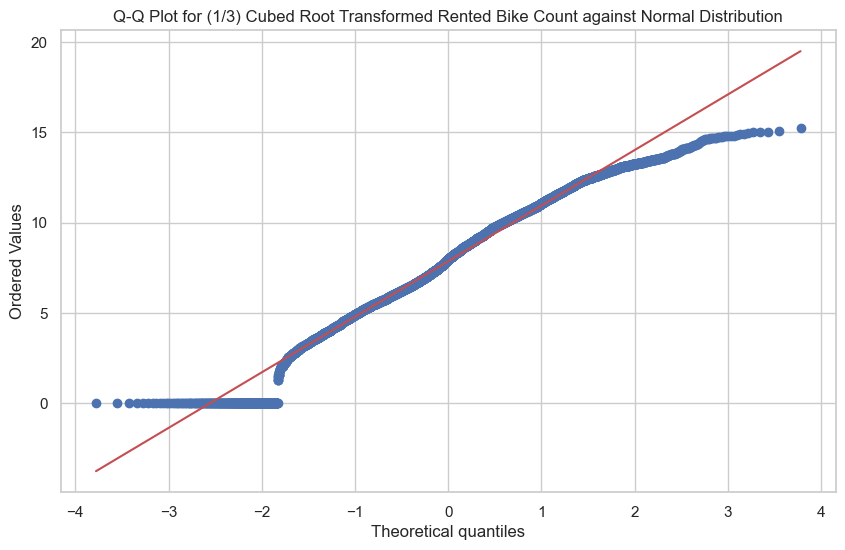

In [234]:
## QQ plot for data transfer
plt.figure(figsize=(10, 6))
stats.probplot(y1**(1/3), dist="norm", plot=plt)
plt.title('Q-Q Plot for (1/3) Cubed Root Transformed Rented Bike Count against Normal Distribution')
plt.show()

In [235]:
from scipy.stats import kstest, poisson
ks_statistic, p_value = kstest(y1**(1/3), 'norm')
print("Kolmogorov-Smirnov statistic:", ks_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("y does not follow normal distribution")
else:
    print("y follows normal distribution")

Kolmogorov-Smirnov statistic: 0.9517831698756737
p-value: 0.0
y does not follow normal distribution


In [236]:
from scipy.stats import kstest, poisson
ks_statistic, p_value = kstest(y1**(1/3), 'poisson', args=(np.mean(y1),))
print("Kolmogorov-Smirnov statistic:", ks_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("y does not follow poisson distribution")
else:
    print("y follows poisson distribution")

Kolmogorov-Smirnov statistic: 1.0
p-value: 0.0
y does not follow poisson distribution


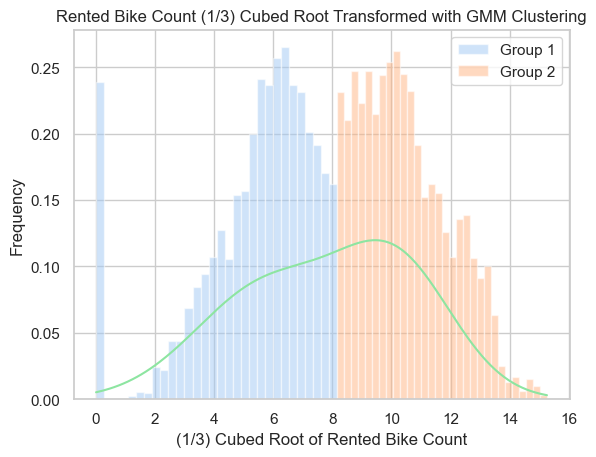

In [237]:
from sklearn.mixture import GaussianMixture

transformed_counts = (y1**(1/3)).values.reshape(-1, 1)

# use Gaussian Mixture Model(GMM)
gmm = GaussianMixture(n_components=2, random_state=0).fit(transformed_counts)
group = gmm.predict(transformed_counts)

xr = np.linspace(transformed_counts.min(), transformed_counts.max(), 200).reshape(-1,1)
density = np.exp(gmm.score_samples(xr))
# print(density)
# print(gmm.means_)
# print(gmm.covariances_)
# print(gmm.weights_)

plt.hist(transformed_counts[group == 0], bins=30, alpha=0.5, label='Group 1',density = True)
plt.hist(transformed_counts[group == 1], bins=30, alpha=0.5, label='Group 2', density = True)
# plt.hist(transformed_counts[group == 2], bins=30, alpha=0.5, label='Group 2', density = True)
# plt.hist(transformed_counts[group == 3], bins=30, alpha=0.5, label='Group 2', density = True)
plt.plot(xr,density)

plt.legend()
plt.title('Rented Bike Count (1/3) Cubed Root Transformed with GMM Clustering')
plt.xlabel('(1/3) Cubed Root of Rented Bike Count')
plt.ylabel('Frequency')



plt.show()


From the histogram above, we can see that there exist (at least two) groups in the cube Rented Count Bike

# EDA

In [267]:
aggregation_date = {
    'Rented Bike Count': 'mean',
    #'Hour': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Wind speed (m/s)': 'mean',
    'Visibility (10m)': 'mean',
    'Dew point temperature(°C)': 'mean',
    'Solar Radiation (MJ/m2)': 'mean',
    'Rainfall(mm)': 'mean',
    'Snowfall (cm)': 'mean',
    'Functioning Day': "first",
    'Seasons': 'first',
    'Holiday': 'first',
    "Weekday": "first",
    "WeekdayOrNot": "first"
}

day_bike = seoulBike.groupby('Date').agg(aggregation_date)
day_bike.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,Seasons,Holiday,Weekday,WeekdayOrNot
Date,,,,,,,,,,,,,,
2017-12-01,397.458333,-2.454167,45.875000,1.537500,1870.750000,-13.545833,0.248750,0.000000,0.0,Yes,Winter,No Holiday,4,1
2017-12-02,355.125000,1.325000,61.958333,1.712500,1471.083333,-5.716667,0.263750,0.000000,0.0,Yes,Winter,No Holiday,5,0
2017-12-03,300.916667,4.875000,81.541667,1.612500,455.750000,1.883333,0.125417,0.166667,0.0,Yes,Winter,No Holiday,6,0
2017-12-04,363.708333,-0.304167,52.500000,3.450000,1362.833333,-9.925000,0.282917,0.004167,0.0,Yes,Winter,No Holiday,0,1
2017-12-05,346.125000,-4.458333,36.416667,1.108333,1959.458333,-17.425000,0.035833,0.000000,0.0,Yes,Winter,No Holiday,1,1


Text(0.5, 1.0, 'Count of Functioning Day')

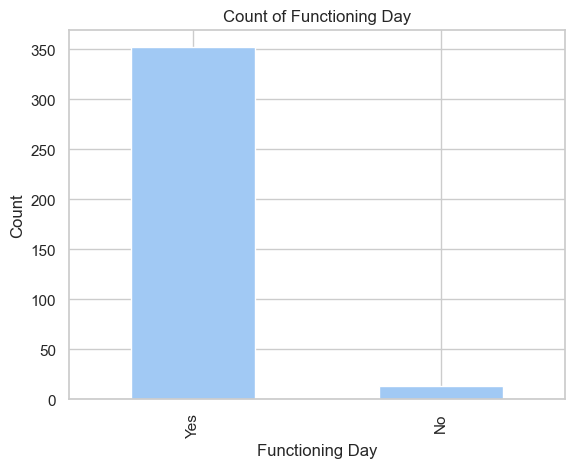

In [268]:
functioning_day_count = day_bike['Functioning Day'].value_counts()
functioning_day_count.plot(kind='bar')

plt.xlabel('Functioning Day')
plt.ylabel('Count')
plt.title('Count of Functioning Day')

In [289]:
chart_season = alt.Chart(day_bike).mark_bar().encode(
    alt.X("Seasons"),
    alt.Y("count()"),
    color="Functioning Day",
).properties(
    width = 240,
)

chart_holiday = alt.Chart(day_bike_sorted).mark_bar().encode(
    alt.X("Holiday"),
    alt.Y("count()"),
    color="Functioning Day",
    size=alt.Size(value = 20)  
).properties(
    width = 240,
)

chart_weekday = alt.Chart(day_bike).mark_bar().encode(
    alt.X("Weekday"),
    alt.Y("count()"),
    color="Functioning Day",
    size=alt.Size(value=20)  
).properties(
    width = 240,
)
chart_season | chart_weekday | chart_holiday

alt.HConcatChart(...)

# Regression

In [302]:
FunctionBike = seoulBike[seoulBike["Functioning Day"] == "Yes"]
FunctionBike = FunctionBike.drop(columns="Functioning Day", axis=1)

FunctionBike_X = FunctionBike.drop(columns=["Rented Bike Count","Date"], axis=1)
FunctionBike_X["Holiday"] = FunctionBike_X["Holiday"].replace({'No Holiday': 0, 'Holiday': 1})
FunctionBike_X = pd.get_dummies(FunctionBike_X, columns=["Seasons"])
FunctionBike_y = FunctionBike["Rented Bike Count"]

In [308]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FunctionBike_X, FunctionBike_y, test_size = 0.2, random_state = 0)
X_train

,Month,Weekday,WeekdayOrNot,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Seasons_Spring,Seasons_Summer,Seasons_Autumn,Seasons_Winter
843,1,4,1,3,-5.5,56,1.1,1453,-12.9,0.00,0.0,0.0,0,0,0,0,1
1705,2,5,0,1,1.7,71,1.2,584,-3.0,0.00,0.0,0.0,0,0,0,0,1
7033,9,3,1,1,20.0,59,1.1,1999,11.7,0.00,0.0,0.0,0,0,0,1,0
3655,5,2,1,7,17.6,94,0.5,166,16.6,0.00,1.0,0.0,0,1,0,0,0
5679,7,2,1,15,34.0,50,3.0,1705,22.1,1.72,0.0,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4421,6,6,0,5,17.1,66,0.3,1370,10.6,0.00,0.0,0.0,0,0,1,0,0
8138,11,0,1,2,8.8,81,0.0,773,5.7,0.00,0.0,0.0,0,0,0,1,0
4907,6,5,0,11,27.5,31,1.9,1841,8.8,2.70,0.0,0.0,0,0,1,0,0
3288,4,1,1,0,9.6,31,0.8,2000,-6.7,0.00,0.0,0.0,0,1,0,0,0


In [309]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train.drop(["Dew point temperature(°C)","Visibility (10m)"], axis = 1))

model = sm.OLS(y_train, X_train).fit()

print(model.summary())

X_test = sm.add_constant(X_test.drop(["Dew point temperature(°C)","Visibility (10m)"], axis = 1))
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     584.8
Date:                Thu, 07 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:35:53   Log-Likelihood:                -50741.
No. Observations:                6772   AIC:                         1.015e+05
Df Residuals:                    6757   BIC:                         1.016e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     